In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [53]:
df = pd.read_csv("/home/artur/ml_shared/week4/carprice.csv")

In [54]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [55]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

<AxesSubplot: >

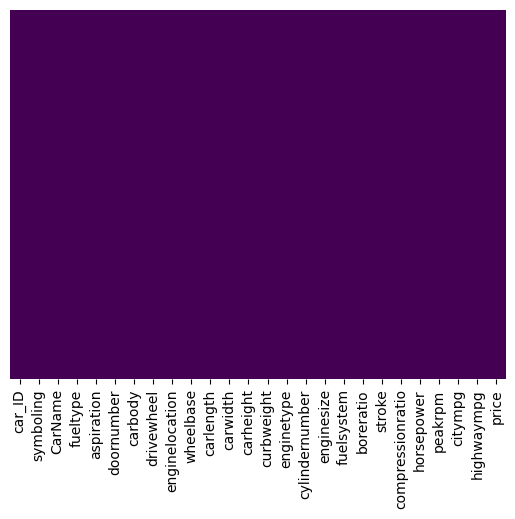

In [57]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap="viridis")

In [58]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [59]:
df.drop(["car_ID", "symboling", "aspiration", "CarName", "aspiration", "boreratio", "stroke", "compressionratio", "peakrpm", "citympg", "highwaympg"], axis=1, inplace=True)

In [60]:
df.head()

,fueltype,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,horsepower,price
0,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,13495.0
1,gas,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,111,16500.0
2,gas,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,154,16500.0
3,gas,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,102,13950.0
4,gas,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,115,17450.0


In [61]:
df.drop(["drivewheel", "wheelbase", "carwidth", "curbweight", "enginetype", "fuelsystem"], axis=1, inplace=True)

In [62]:
df.head()

,fueltype,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price
0,gas,two,convertible,front,168.8,48.8,four,130,111,13495.0
1,gas,two,convertible,front,168.8,48.8,four,130,111,16500.0
2,gas,two,hatchback,front,171.2,52.4,six,152,154,16500.0
3,gas,four,sedan,front,176.6,54.3,four,109,102,13950.0
4,gas,four,sedan,front,176.6,54.3,five,136,115,17450.0


In [63]:
print(df['fueltype'].unique())


['gas' 'diesel']


In [64]:
print(df['carbody'].unique())

['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


In [65]:
print(df['enginelocation'].unique())

['front' 'rear']


In [66]:
print(df['cylindernumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [67]:
df["isGas"] = pd.get_dummies(df["fueltype"], drop_first=True)

In [68]:
df["fueltype"] = pd.get_dummies(df["fueltype"], drop_first=True)

In [69]:
df.head()

,fueltype,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price,isGas
0,True,two,convertible,front,168.8,48.8,four,130,111,13495.0,True
1,True,two,convertible,front,168.8,48.8,four,130,111,16500.0,True
2,True,two,hatchback,front,171.2,52.4,six,152,154,16500.0,True
3,True,four,sedan,front,176.6,54.3,four,109,102,13950.0,True
4,True,four,sedan,front,176.6,54.3,five,136,115,17450.0,True


In [70]:
df["fueltype"] = df["isGas"]

In [71]:
df.drop("isGas", axis=1, inplace=True
)

In [72]:
df.head()

,fueltype,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price
0,True,two,convertible,front,168.8,48.8,four,130,111,13495.0
1,True,two,convertible,front,168.8,48.8,four,130,111,16500.0
2,True,two,hatchback,front,171.2,52.4,six,152,154,16500.0
3,True,four,sedan,front,176.6,54.3,four,109,102,13950.0
4,True,four,sedan,front,176.6,54.3,five,136,115,17450.0


In [73]:
df.rename(columns={"fueltype": "isGas"}, inplace=True)

In [74]:
df["numberOfDoors"] = df["doornumber"].apply(lambda x: 2 if x == "two" else 4 )

In [75]:
df.head()

,isGas,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price,numberOfDoors
0,True,two,convertible,front,168.8,48.8,four,130,111,13495.0,2
1,True,two,convertible,front,168.8,48.8,four,130,111,16500.0,2
2,True,two,hatchback,front,171.2,52.4,six,152,154,16500.0,2
3,True,four,sedan,front,176.6,54.3,four,109,102,13950.0,4
4,True,four,sedan,front,176.6,54.3,five,136,115,17450.0,4


In [76]:
df['carType'] = df['carbody'].map({'convertible': 1, 'hatchback': 2, 'sedan': 3, 'wagon': 4, 'hardtop': 5})


In [77]:
df.head()

,isGas,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price,numberOfDoors,carType
0,True,two,convertible,front,168.8,48.8,four,130,111,13495.0,2,1
1,True,two,convertible,front,168.8,48.8,four,130,111,16500.0,2,1
2,True,two,hatchback,front,171.2,52.4,six,152,154,16500.0,2,2
3,True,four,sedan,front,176.6,54.3,four,109,102,13950.0,4,3
4,True,four,sedan,front,176.6,54.3,five,136,115,17450.0,4,3


In [78]:
df["locationInFront"] = pd.get_dummies(df["enginelocation"], drop_first=True)

In [79]:
df.head()

,isGas,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price,numberOfDoors,carType,locationInFront
0,True,two,convertible,front,168.8,48.8,four,130,111,13495.0,2,1,False
1,True,two,convertible,front,168.8,48.8,four,130,111,16500.0,2,1,False
2,True,two,hatchback,front,171.2,52.4,six,152,154,16500.0,2,2,False
3,True,four,sedan,front,176.6,54.3,four,109,102,13950.0,4,3,False
4,True,four,sedan,front,176.6,54.3,five,136,115,17450.0,4,3,False


In [80]:
df["locationInFront"] =~df["locationInFront"]

In [81]:
df.head()

,isGas,doornumber,carbody,enginelocation,carlength,carheight,cylindernumber,enginesize,horsepower,price,numberOfDoors,carType,locationInFront
0,True,two,convertible,front,168.8,48.8,four,130,111,13495.0,2,1,True
1,True,two,convertible,front,168.8,48.8,four,130,111,16500.0,2,1,True
2,True,two,hatchback,front,171.2,52.4,six,152,154,16500.0,2,2,True
3,True,four,sedan,front,176.6,54.3,four,109,102,13950.0,4,3,True
4,True,four,sedan,front,176.6,54.3,five,136,115,17450.0,4,3,True


In [82]:
df.drop(["doornumber", "carbody", "enginelocation"], axis=1, inplace=True)


In [83]:
df.head()

,isGas,carlength,carheight,cylindernumber,enginesize,horsepower,price,numberOfDoors,carType,locationInFront
0,True,168.8,48.8,four,130,111,13495.0,2,1,True
1,True,168.8,48.8,four,130,111,16500.0,2,1,True
2,True,171.2,52.4,six,152,154,16500.0,2,2,True
3,True,176.6,54.3,four,109,102,13950.0,4,3,True
4,True,176.6,54.3,five,136,115,17450.0,4,3,True


In [84]:
df.head()

,isGas,carlength,carheight,cylindernumber,enginesize,horsepower,price,numberOfDoors,carType,locationInFront
0,True,168.8,48.8,four,130,111,13495.0,2,1,True
1,True,168.8,48.8,four,130,111,16500.0,2,1,True
2,True,171.2,52.4,six,152,154,16500.0,2,2,True
3,True,176.6,54.3,four,109,102,13950.0,4,3,True
4,True,176.6,54.3,five,136,115,17450.0,4,3,True


In [85]:
print(df['cylindernumber'].unique())

['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [86]:
df['cylinderAmount'] = df['cylindernumber'].map({'four': 4, 'six': 6, 'five': 5, 'three': 3, 'twelve': 12, 'two': 2, 'eight': 8})

In [87]:
df.drop(["cylindernumber"], axis=1, inplace=True)

In [88]:
df.head()

,isGas,carlength,carheight,enginesize,horsepower,price,numberOfDoors,carType,locationInFront,cylinderAmount
0,True,168.8,48.8,130,111,13495.0,2,1,True,4
1,True,168.8,48.8,130,111,16500.0,2,1,True,4
2,True,171.2,52.4,152,154,16500.0,2,2,True,6
3,True,176.6,54.3,109,102,13950.0,4,3,True,4
4,True,176.6,54.3,136,115,17450.0,4,3,True,5


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   isGas            205 non-null    bool   
 1   carlength        205 non-null    float64
 2   carheight        205 non-null    float64
 3   enginesize       205 non-null    int64  
 4   horsepower       205 non-null    int64  
 5   price            205 non-null    float64
 6   numberOfDoors    205 non-null    int64  
 7   carType          205 non-null    int64  
 8   locationInFront  205 non-null    bool   
 9   cylinderAmount   205 non-null    int64  
dtypes: bool(2), float64(3), int64(5)
memory usage: 13.3 KB


In [90]:
df.describe()

,carlength,carheight,enginesize,horsepower,price,numberOfDoors,carType,cylinderAmount
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.00000,205.000000
mean,174.049268,53.724878,126.907317,104.117073,13276.710571,3.121951,2.80000,4.380488
std,12.337289,2.443522,41.642693,39.544167,7988.852332,0.994966,0.83666,1.080854
min,141.100000,47.800000,61.000000,48.000000,5118.000000,2.000000,1.00000,2.000000
25%,166.300000,52.000000,97.000000,70.000000,7788.000000,2.000000,2.00000,4.000000
50%,173.200000,54.100000,120.000000,95.000000,10295.000000,4.000000,3.00000,4.000000
75%,183.100000,55.500000,141.000000,116.000000,16503.000000,4.000000,3.00000,4.000000
max,208.100000,59.800000,326.000000,288.000000,45400.000000,4.000000,5.00000,12.000000


In [91]:
df.head()

,isGas,carlength,carheight,enginesize,horsepower,price,numberOfDoors,carType,locationInFront,cylinderAmount
0,True,168.8,48.8,130,111,13495.0,2,1,True,4
1,True,168.8,48.8,130,111,16500.0,2,1,True,4
2,True,171.2,52.4,152,154,16500.0,2,2,True,6
3,True,176.6,54.3,109,102,13950.0,4,3,True,4
4,True,176.6,54.3,136,115,17450.0,4,3,True,5


In [92]:
# Dataset Explanation

# isGas:            Gas = True, Diesel = False
# carType:          convertible = 1, hatchback = 2, sedan = 3, wagon = 4, hardtop = 5
# locationInFront:  Front = True, Back = False  

In [95]:
df.drop("carheight", axis=1, inplace=True)

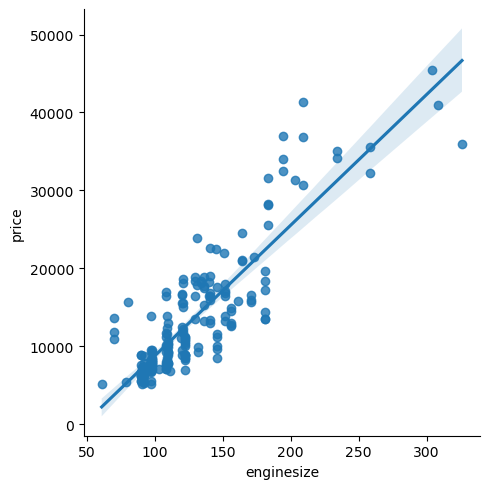

In [96]:
sns.lmplot(x="enginesize", y="price", data=df)

In [97]:
df.head()

,isGas,carlength,enginesize,horsepower,price,numberOfDoors,carType,locationInFront,cylinderAmount
0,True,168.8,130,111,13495.0,2,1,True,4
1,True,168.8,130,111,16500.0,2,1,True,4
2,True,171.2,152,154,16500.0,2,2,True,6
3,True,176.6,109,102,13950.0,4,3,True,4
4,True,176.6,136,115,17450.0,4,3,True,5


In [110]:
df.drop("carlength", axis=1, inplace=True)

In [111]:
df.head()

,isGas,enginesize,horsepower,price,numberOfDoors,carType,locationInFront,cylinderAmount
0,True,130,111,13495.0,2,1,True,4
1,True,130,111,16500.0,2,1,True,4
2,True,152,154,16500.0,2,2,True,6
3,True,109,102,13950.0,4,3,True,4
4,True,136,115,17450.0,4,3,True,5


In [112]:
X = df[["isGas", "enginesize", "horsepower", "numberOfDoors", "carType", "locationInFront", "cylinderAmount"]]
y = df["price"]

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [114]:
X_train

,isGas,enginesize,horsepower,numberOfDoors,carType,locationInFront,cylinderAmount
66,False,134,72,4,3,True,4
111,True,120,95,4,3,True,4
153,True,92,62,4,4,True,4
96,True,97,69,4,3,True,4
38,True,110,86,2,2,True,4
...,...,...,...,...,...,...,...
106,True,181,160,2,2,True,6
14,True,164,121,4,3,True,6
92,True,97,69,4,3,True,4
179,True,171,161,2,2,True,6


In [101]:
from sklearn.linear_model import LinearRegression

In [115]:
linear_model = LinearRegression()

In [116]:
linear_model.fit(X_train, y_train)

LinearRegression()

In [117]:
print("Coef: ", linear_model.coef_)

Coef:  [-2199.66996368   119.61363719    64.21896083   894.29413109
  -494.49205781 -9183.45687221  -463.08544284]


In [118]:
predictions = linear_model.predict(X_test)

Text(0, 0.5, 'Predicated Y')

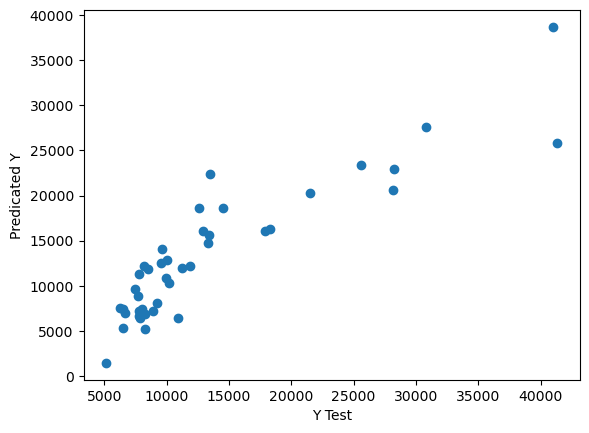

In [119]:
plt.scatter(y_test, predictions)
plt.xlabel("Y Test")
plt.ylabel("Predicated Y")

In [107]:
from sklearn import metrics

In [125]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE:  2828.6708988672603
MSE:  15634598.661241258
RMSE:  53.1852507643544


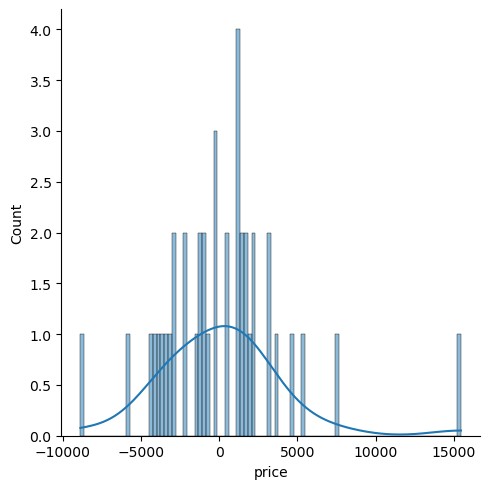

In [123]:
sns.displot((y_test - predictions), bins=100, kde=True)

In [124]:
# Dataset Explanation

# isGas:            Gas = True, Diesel = False
# carType:          convertible = 1, hatchback = 2, sedan = 3, wagon = 4, hardtop = 5
# locationInFront:  Front = True, Back = False  


In [126]:
print("MAE: ", metrics.mean_absolute_error(y_test, predictions))
print("MSE: ", metrics.mean_squared_error(y_test, predictions))
print("RMSE: ", np.sqrt(metrics.mean_absolute_error(y_test, predictions)))

MAE:  2828.6708988672603
MSE:  15634598.661241258
RMSE:  53.1852507643544


In [129]:
# Question: 
# 1) Is it acceptable to map car types (such as convertible, hatchback, sedan, etc.) to numerical values, 
#    or will this create an weight system (e.g., 1 = bad, 5 = good)?
# 2) Do I interpret the RMSE metric correctly that it is actually quite good, just 58$ differnce in prediction? 